# Sentiment Analysis of COVID-19 Vaccine Tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob



In [2]:
df = pd.read_csv("vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [3]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(116057, 16)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                116057 non-null  int64 
 1   user_name         116057 non-null  object
 2   user_location     116057 non-null  object
 3   user_description  116057 non-null  object
 4   user_created      116057 non-null  object
 5   user_followers    116057 non-null  int64 
 6   user_friends      116057 non-null  int64 
 7   user_favourites   116057 non-null  int64 
 8   user_verified     116057 non-null  bool  
 9   date              116057 non-null  object
 10  text              116057 non-null  object
 11  hashtags          116057 non-null  object
 12  source            116057 non-null  object
 13  retweets          116057 non-null  int64 
 14  favorites         116057 non-null  int64 
 15  is_retweet        116057 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

## Data Preprocessing

In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
df = df.drop_duplicates('text')
print(df.shape)

(115849, 15)


In [7]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)

print(df.shape)

df.head()

(115849, 15)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [8]:
# we do not care about the exact time of each tweet, we just want the date
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


## Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,1.158490e+05,115849.000000,1.158490e+05,115849.000000,115849.000000
mean,1.594820e+05,1387.750710,1.537447e+04,3.456379,15.505839
std,1.115311e+06,6970.271513,4.346030e+04,65.137923,254.309936
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.140000e+02,126.000000,2.670000e+02,0.000000,0.000000
50%,6.210000e+02,398.000000,2.185000e+03,0.000000,1.000000
75%,3.397000e+03,1149.000000,1.112800e+04,1.000000,3.000000
max,1.635305e+07,582461.000000,1.214813e+06,12294.000000,54017.000000


<AxesSubplot:>

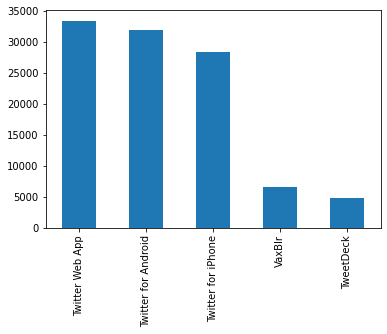

In [10]:
# which device are people tweeting about the vaccine from?
df['source'].value_counts().head(n=5).plot.bar()

<AxesSubplot:>

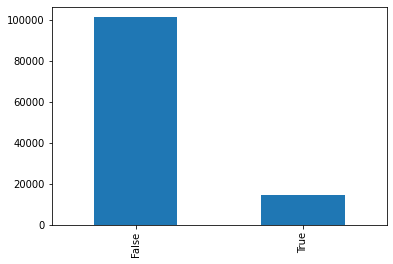

In [11]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [12]:
df[df['user_verified'] == True].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
15,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False
17,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False
22,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Buffer,1,0,False
43,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter Web App,0,2,False
44,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False


In [13]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
221427,This video fits the last almost 2 years into 2 minutes. At #SputnikV we strongly believe that it is only through Va… https://t.co/Ggi7X5qO8x,2021-11-11,Sputnik V,"Moscow, Russia",['SputnikV'],54017,12294
68358,"RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92",2021-04-20,Sputnik V,"Moscow, Russia",['SputnikV'],25724,11288
46053,Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD,2021-04-01,hotvickkrishna,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']",19622,7695
66822,ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ,2021-04-21,ICMR,New Delhi,['COVAXIN'],11995,4851
76306,#Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y,2021-05-19,Sputnik V,"Moscow, Russia","['Argentina', 'SputnikV']",14412,2550
17118,"Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf",2021-03-01,Dr. S. Jaishankar,"New Delhi, India",['Covaxin'],22815,2360
53045,I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A,2021-04-12,dawnymock,Fredericton New Brunswick,"['covid', 'vaccine', 'pfizer', 'moderna']",10175,2299
7126,"New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO",2021-02-10,Robert F. Kennedy Jr,"Los Angles, California",['mRNA'],3090,2247
24268,"#Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared ""Safe, Immunogenic wi… https://t.co/FAUOEHJmAw",2021-03-09,Megh Updates 🚨,Turn on Notification 🔔,['Covaxin'],9458,2095
32826,A batch of fake Sputnik V vaccines was confiscated in Mexico. See this comparison of the genuine #SputnikV with a f… https://t.co/J7PxMq2e1M,2021-03-18,Sputnik V,"Moscow, Russia",['SputnikV'],3473,1980


In [14]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']]

,text,date,user_name,user_location,hashtags,favorites,retweets
35,An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud,2020-12-12,Shahjhan Malik | #WearAMask,"Nottinghamshire, England","['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']",37,2
293,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2,2020-12-12,DD News,"New Delhi, India",['UnitedStates'],21,4
25,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432,2020-12-12,Devan Surendran,"Nottingham, England","['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']",10,1
17,"Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F",2020-12-12,ILKHA,Türkiye,"['Iran', 'coronavirus', 'PfizerBioNTech']",5,3
298,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/Lyq594UEks,2020-12-12,DD India,"New Delhi, India",['UnitedStates'],5,0
...,...,...,...,...,...,...,...
227857,18-44 #URBAN #Bengaluru #CovidVaccine Availability for 23/11 at 09:00AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose… https://t.co/Bmeh0bE5SV,2021-11-23,VaxBLR,"Bengaluru, India","['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",0,0
227858,45+ #URBAN #Bengaluru #CovidVaccine Availability for 23/11 at 08:30AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose1:… https://t.co/nadMkeBWXA,2021-11-23,VaxBLR,"Bengaluru, India","['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",0,0
227860,18-44 #URBAN #Bengaluru #CovidVaccine Availability for 23/11 at 08:00AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose… https://t.co/3MWSZUudId,2021-11-23,VaxBLR,"Bengaluru, India","['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",0,0
227861,45+ #URBAN #Bengaluru #CovidVaccine Availability for 23/11 at 07:30AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose1:… https://t.co/AGqvXoC8w1,2021-11-23,VaxBLR,"Bengaluru, India","['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",0,0


## Sentiment Analysis Using TextBlob

In [15]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,0.125000
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,0.00,0.033333
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False,-0.10,0.500000
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False,0.00,0.000000
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.25,0.333333


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

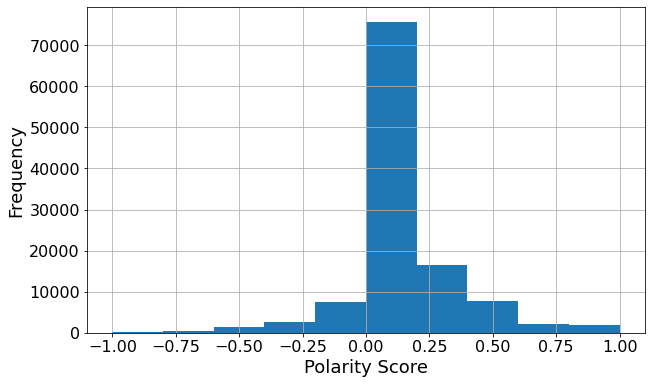

In [16]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

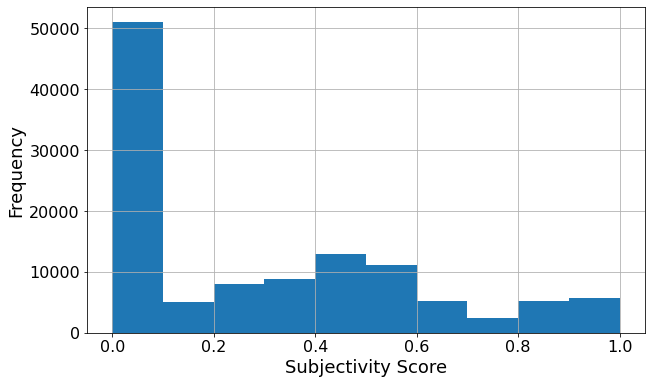

In [17]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [18]:
# inspect the most negatively charged tweets
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,Man we gotta do something about the #unvaccinated ..\n Holy cannoli this is horrible #SuperSpreders of #COVID19 are… https://t.co/LuugAsRBYn,-1.0,1.000000
1,"Mixing Vaccines #Pfizer #moderna with #AstraZeneca sounds like a very bad idea , Science you say ! #NACI #lpc… https://t.co/OfxX2TP6UI",-1.0,0.866667
2,"Day 2 after getting a shot of #Moderna - Fever 37.5°, terrible pain in arm, feeling unwell… but hey hey #IGotTheShot",-1.0,1.000000
3,This is some seriously horrible piece of news.\n#COVID19Vaccine #Covaxin #bharatbiotech \nhttps://t.co/93zBSjgAKr,-1.0,1.000000
4,"@WHO @who means "" WORLD HORRIBLE ORGANIZATION"". \n\nThey eat money from #China. They will not approved #COVAXIN this year.",-1.0,1.000000
5,@sardesairajdeep @GKangInd Why this vicious lady is NOT booked for spreading vaccine hesitancy against #COVAXIN is… https://t.co/EDC9FUz2PL,-1.0,1.000000
6,@Smita_Sharma @China_Amb_India @EOIBeijing @mukhia_ji #covaxin must get recognised. Or it’s horrible for them to go… https://t.co/Jq9kIYswwK,-1.0,1.000000
7,"@stephenLweiss @jlebenthal @Downtown_Rocks @ScottWapnerCNBC Real disappointed in Steve’s comments on #AZ, this beca… https://t.co/IqHx5EfmXK",-1.0,1.000000
8,Yippee!! So I don't need #SputnikV as I am a bit skeptic about vaccination. Actually I hate needles!!! Can't bear t… https://t.co/wyFh7YDPO8,-1.0,0.900000
9,Are you noticing the pattern yet? 💯 It's the Jews! 🤬🕶️ Evil to the core. #Pfizer #Moderna #novavax #Sanofi #GSK… https://t.co/Brvy4IhFf9,-1.0,1.000000


In [19]:
# inspect the most positively charged tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,"NIH-Backed #Study Finds #Moderna, #Pfizer Boosters Work Best\n\nhttps://t.co/CZVqiyEpbM https://t.co/oUiawakeYy",1.0,0.30
1,One best thing about 2021! ☺️ #Covaxin,1.0,0.30
2,This is the best start of #AtmanirbharBharat #SputnikV Yeh toh bas suruat hain. #EidMubarak,1.0,0.30
3,"#Sinopharm, just like #Covishield, is a great vaccine! There are differences in how they work, their composition. T… https://t.co/dID1IGRShC",1.0,0.75
4,CONgress and left-lootyens media shamelessly tried their level best to discredited #BharatBiotech made indigenous… https://t.co/OvQ0zZo0TV,1.0,0.30
5,A wonderfully conducted interview of my dear friend Dr. Ujjwal Rathore on COVID-19 &amp; it’s vaccines.\n#Covishield… https://t.co/pN1zh6bZnt,1.0,1.00
6,A good news! #Covaxin neutralizes #DoubleMutant strain! #COVID19India https://t.co/1ohMwliNOF,1.0,0.60
7,A study of COVID vaccine boosters suggests #Moderna or #Pfizer works best #Covid19Boosters https://t.co/JhtHMIqy6d,1.0,0.30
8,So proud of the hub for getting his #booster today! #Moderna @opinionated_man,1.0,1.00
9,Excellent news for those of us who received a #Moderna vaccine💉 https://t.co/nCLHMEk3tJ,1.0,1.00


In [20]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,Japan Halts Use of 1.63 Million Moderna Doses over Contamination\n#japan #moderna #news\nRead the Article:… https://t.co/6djH17wPux,0.0,0.0
1,Haffkine Institute secures Govt nod to manufacture Covaxin @BharatBiotech #haffkininstitute #covaxin #bharatbiotech… https://t.co/Weh97FuEWL,0.0,0.0
2,On Thursday CM #UddhavThackerya thanked PM @narendramodi for allowing #Maharashtra government-owned… https://t.co/gjG9NFdrRN,0.0,0.0
3,@restyworo Any idea from where can I get #modernavaccine in #southjakarta called 5 hospitals and none of them have… https://t.co/BOtkQWbO3c,0.0,0.0
4,What If We All Shared One Connected Mind.\nhttps://t.co/A7pnRr42Zs\nTags:\n#cancelboardexams2021 \n#cancelboards2021… https://t.co/rUJV5MrxHr,0.0,0.0
5,$MRNA #Moderna To Supply Canada With Up To 35 Million Doses Of Its #COVID19 #Vaccine Every Year Through 2024 -- MarketWatch,0.0,0.0
6,"@jennmckay007 #Moderna in March, second shot in April. The side effects were nothing compared to being intubated or… https://t.co/zJzbIGrS3W",0.0,0.0
7,He took #Covaxin yesterday. https://t.co/w0xYZxaUmR,0.0,0.0
8,Second jab #moderna vaccination 💉 done!! Hope I don’t get any side affects..,0.0,0.0
9,"If anyone to be blamed, it is #pappu, #Sudalai, and @yadavakhilesh. These 3 Thannappas planted the doubt about… https://t.co/VZuuDm01u8",0.0,0.0


In [21]:
# inspect the most objective tweets
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,In anticipation of tomorrow's possible #Pfizer news. #vaccine #VAXXED #VaxToTheMax #COVID #COVID19 #COVIDIOTS… https://t.co/ZWkBqqjk2e,0.000,1.0
1,💉 The EU hasn't engaged in negotiations with Russia on a potential purchase of #SputnikV vaccine against the corona… https://t.co/01cUq7LmAt,0.000,1.0
2,I'm so glad to see my President @POTUS and #Michigan #Governor @GovWhitmer touring the #Pfizer manufacturer site! W… https://t.co/0aX9bQIYRv,0.625,1.0
3,"@sallylepage Team #PfizerBioNTech here, only had some fatigue!",0.000,1.0
4,Why does the #pfizerbiontech vaccine have to be stored in ultra cold temperatures? Watch! @Bill_HinkleJr https://t.co/UXDIXGTUlT,-0.750,1.0
5,#Covid’s Forgotten Hero: The Untold Story Of The #Scientist Whose Breakthrough Made The #Vaccines Possible \n#mRNA… https://t.co/UxC89fUORA,0.000,1.0
6,Overheard at @WheatonCollege: two students arguing about #Moderna vs #Pfizer. Just glad they weren't arguing… https://t.co/wIlwef9tlE,0.500,1.0
7,"""Only jumlas, no ... - https://t.co/UlTbDYHBG9 \nGet your news featured use #IndiaPostUSA \n#AapDelhiHealthBulletin… https://t.co/rXezu81Mu3",0.000,1.0
8,#COVAXIN vaccinated people can't enter the US. Only #COVISHIELD\nhttps://t.co/RrIbxs8J2R,0.000,1.0
9,I waited 9 weeks between jabs… caved when we had our #Delta surge… was supposed to be 16 weeks originally. Glad I g… https://t.co/Am5FFBsZRG,0.500,1.0


[negative    11937
neutral     56915
positive    46997
Name: sentiment, dtype: int64]


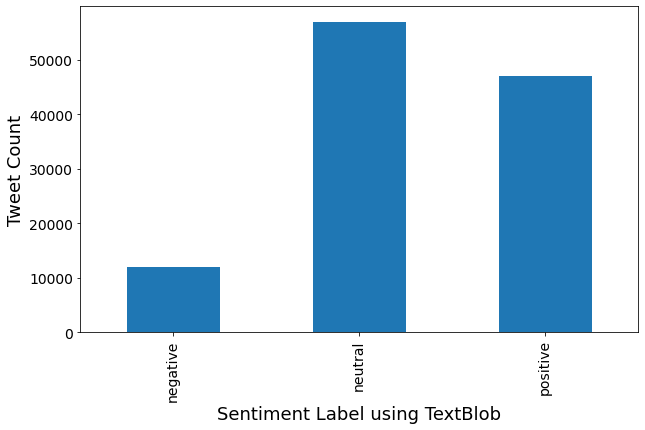

<Figure size 432x288 with 0 Axes>

In [22]:
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
val=[df['sentiment'].value_counts().sort_index()]
print(val)
plt.xlabel('Sentiment Label using TextBlob', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()


## Sentiment Analysis with NLTK Vader

In [23]:
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df['nltk_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df['nltk_cmp_score'] = df['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
neutral_thresh = 0.01

In [25]:
# Categorize scores into the sentiments of positive, neutral or negative
df['nltk_sentiment'] = df['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))



In [26]:
df['nltk_cmp_score'].describe()

count    115849.000000
mean          0.125007
std           0.349607
min          -0.968200
25%           0.000000
50%           0.000000
75%           0.421500
max           0.971800
Name: nltk_cmp_score, dtype: float64

[Negative    18280
Neutral     52008
Positive    45561
Name: nltk_sentiment, dtype: int64]


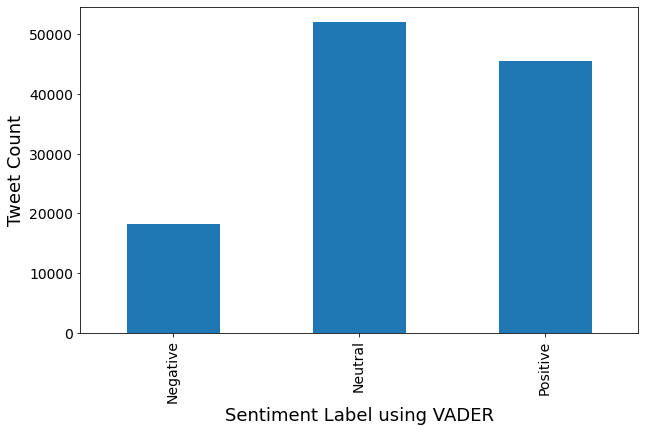

<Figure size 432x288 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(10, 6))
df['nltk_sentiment'].value_counts().sort_index().plot.bar()
val=[df['nltk_sentiment'].value_counts().sort_index()]
print(val)
plt.xlabel('Sentiment Label using VADER', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

## Composite Sentiment with Ensemble Method

In [28]:
# Take average of the 2 sentiment scores of NLTK Vader and TextBlob
df['composite_score'] =  (df['nltk_cmp_score'] 
                                + df['polarity'])/2

In [29]:
df['composite_score'].describe()

count    115849.000000
mean          0.116492
std           0.252114
min          -0.979950
25%           0.000000
50%           0.025800
75%           0.263350
max           0.973650
Name: composite_score, dtype: float64

In [30]:
# Threshold for neutral sentiment
neutral_thresh = 0.01

In [31]:
# Convert average sentiment score (from all 2 analyzers) into sentiment categories
df['composite_vote_2'] = df['composite_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

[Negative    21046
Neutral     35216
Positive    59587
Name: composite_vote_2, dtype: int64]


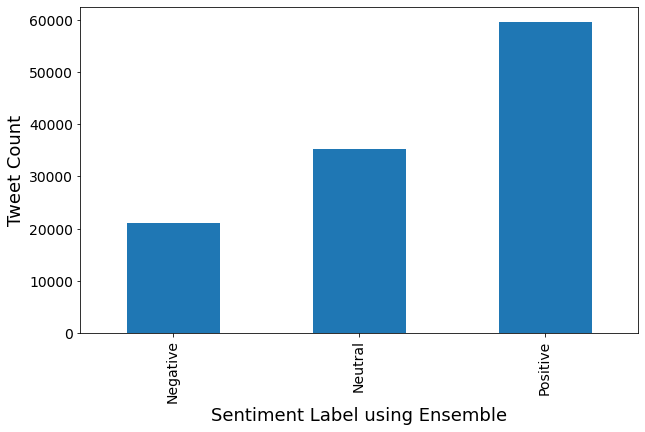

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(10, 6))
df['composite_vote_2'].value_counts().sort_index().plot.bar()
val=[df['composite_vote_2'].value_counts().sort_index()]
print(val)
plt.xlabel('Sentiment Label using Ensemble', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()